In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df =pd.read_csv("../datasets/UpdatedResumeDataSet.csv")
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [5]:
df['Category'].value_counts()


Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

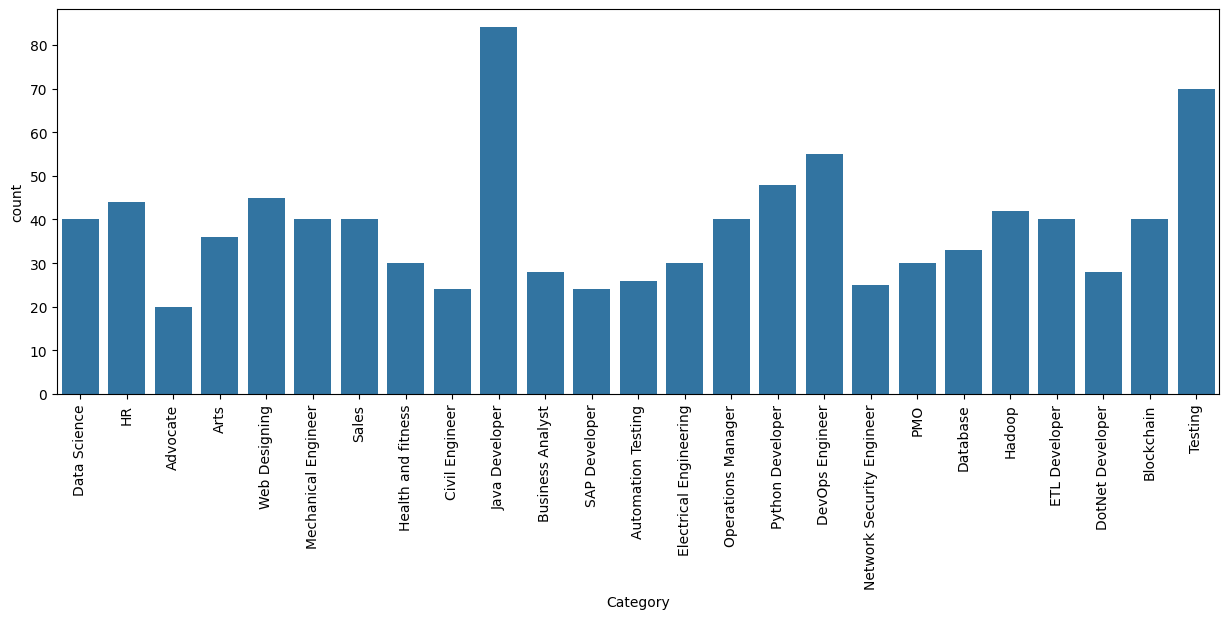

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(x= 'Category', data = df);
plt.xticks(rotation = 90)
plt.show()



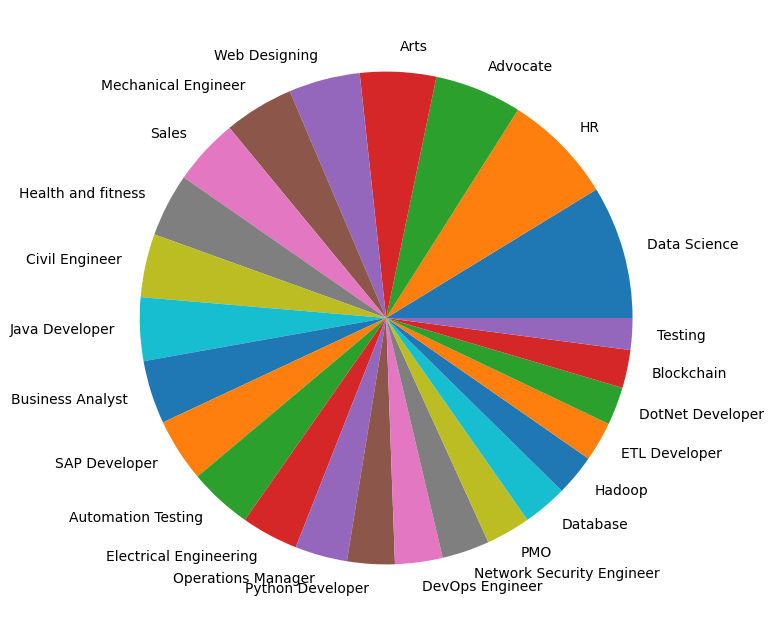

In [45]:
plt.figure(figsize=(15,8))
labels = df['Category'].unique()
label_count = df['Category'].value_counts()

plt.pie(x=label_count, labels=labels)
plt.show()

## Cleaning the resume dataset

In [46]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [47]:
df['Resume'] = df['Resume'].apply(lambda x : cleanResume(x))

In [48]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

## Words in categorical values

In [49]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [50]:
dir(labelencoder)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sklearn_auto_wrap_output_keys',
 '_validate_data',
 '_validate_params',
 'fit',
 'fit_transform',
 'get_metadata_routing',
 'get_params',
 'inverse_transform',
 'set_output',
 'set_params',
 'transform']

In [51]:
df['Category'] = labelencoder.fit_transform(df['Category'])

In [53]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

## Vectorization

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [56]:
vectorizedText = tfidf.fit_transform(df['Resume'])

In [60]:
vectorizedText.shape

(962, 7566)

## Split dataset

In [61]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(vectorizedText,df['Category'])

In [63]:
xtrain.shape

(721, 7566)

In [65]:
xtest.shape

(241, 7566)

In [67]:
ytrain.shape

(721,)

In [68]:
ytest.shape

(241,)

In [70]:
xtrain

<721x7566 sparse matrix of type '<class 'numpy.float64'>'
	with 137401 stored elements in Compressed Sparse Row format>

## Training model

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
clf = KNeighborsClassifier()
clf.fit(xtrain,ytrain)
pred = clf.predict(xtest)
print(pred)
print("Score : ",accuracy_score(ytest,pred))

[ 6 14 16 20 21 19 22 24  6 13 19  4 22  8 13  8  9 21 20 18  9 19 24  6
 23 15 24 20 22 15  7 21  6 18 23 14  5  7 18 23  2 15 23 15  3 18 17 19
 24  3  2  8 10 23 15  6  8  3  6 22 15 18 20  5 15 19  7  2 21  6 12 17
 24  8 13 12 20 15 15 15  4 24  6 16 15 15 15  1 15 16 21 12 15  3 12 22
 24  8 21 16 24 12 12  9 16  3  9  8 15  4 23 10 24 10  8  8 21 13 23 20
 24  2  3  6  4 16 15 13 24 18 18 14 11 12 16 14 24 14 17  8 15 15 20 13
 18 20 18 15 13  8 17 15 19 11  3  9 18 19 12  3 18 14 20 22 20 17  4  4
 15 17 20 17  4  2 23 10 15 10 15  6  2 23 22 12  3  3  3 24 15 24  4  0
 16  8 15  4 18 23 13 15  3  9 15 12 14 11 12  8  1 16 19 11  2 18 15  8
  6 24  0 15 19 13  5 15  4 24 10 15 10 20 14  2  8  6 12 17 20  8 23  8
 23]
Score :  0.9626556016597511


In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
clf2 = OneVsRestClassifier(KNeighborsClassifier())
clf2.fit(xtrain,ytrain)
ypred = clf2.predict(xtest)
print(ypred)
print("Score : ",accuracy_score(ytest,ypred))

[ 6 14 16 20 21 19 22 24  6 13 19  4 22  8 13  8  9 21 20 18  9 19 24  6
 23 15 24 20 22 15  7 21  6 18 23 14  5  7 18 23  2 15 23 15  3 18 17 19
 24  3  2  8 10 23 15  6  8  3  6 22 15 18 20  5 15 19  7  2 21  6 12 17
 24  8 13 12 20 15 15 15  4 24  6 16 15 15 15  1 15 16 21 12 15  3 12 22
 24  8 21 16 24 12 12  9 16  3  9  8 15  4 23 10 24 10  8  8 21 13 23 20
 24  2  3  6  4 16 15 13 24 18 18 14 11 12 16 14 24 14 17  8 15 15 20 13
 18 20 18 15 13  8 17 15 19 11  3  9 18 19 12  3 18 14 20 22 20 17  4  4
 15 17 20 17  4  2 23 10 15 10 15  6  2 23 22 12  3  3  3 24 15 24  4  0
 16  8 15  4 18 23 13 15  3  9 15 12 14 11 12  8  1 16 19 11  2 18 15  8
  6 24  0 15 19 13  5 15  4 24 10 15 10 20 14  2  8  6 12 17 20  8 23  8
 23]
Score :  0.9626556016597511


## Predicting

In [105]:
sample_resume = """
Aditya Sharma
Email: aditya.sharma@example.com | Phone: +91-9876543210 | LinkedIn: linkedin.com/in/aditya-sharma

Summary
Highly skilled Senior Java Developer with 8+ years of experience in designing, developing, and deploying enterprise-level applications. Proficient in Java, Spring Boot, and microservices architecture. Adept at leading development teams, optimizing application performance, and delivering scalable solutions.

Skills
Languages: Java, Kotlin, Python
Frameworks: Spring Boot, Hibernate, JPA
Tools & Technologies: Docker, Kubernetes, Jenkins, Git, Maven
Databases: MySQL, PostgreSQL, MongoDB
Cloud: AWS, Azure
Other: Microservices, RESTful APIs, TDD, Agile/Scrum
Experience
Senior Java Developer
"""

### Taking out model and tfidf vectorizer as it is drained on our data

In [106]:
import pickle 
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf2,open('clf2.pkl','wb'))

In [107]:
import pickle
with open('clf2.pkl', 'rb') as file:
    clf = pickle.load(file)
# Cleaning the resume
cleaned_resume = cleanResume(sample_resume)
# transforming the cleaned resume
vectors = tfidf.transform([cleaned_resume])
# predicting with classifier
class_id = clf.predict(vectors)[0]

In [108]:
class_id

15

In [92]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [94]:
df_again = pd.read_csv("../datasets/UpdatedResumeDataSet.csv")
df_again.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [95]:
df_again['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [110]:
len(df_again['Category'])


962

In [111]:
len(df_again['Category'].unique())

25